In [15]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense , Dropout, BatchNormalization
from PIL import Image 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
plt.style.use("fivethirtyeight")

In [17]:
enc = OneHotEncoder()
enc.fit([[0],[1]])

#0 => means Tumor 
#1 => means no Tumor 

OneHotEncoder()

In [21]:
data = []
#data => means it stores images in numpy ndarray form
#paths => means path of all images 
#res => stores the res ie whether tumor or not
paths = []
res = []

for r, d, files in os.walk(r"C:/Users/Asus/Documents/Brain tumor/yes"):
    for file in files:
        if ".jpg" in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if img.shape == (256,256,3):
        data.append(img)
        res.append(enc.transform([[0]]).toarray())


In [22]:
paths = []


for r, d, files in os.walk(r"C:/Users/Asus/Documents/Brain tumor/no"):
    for file in files:
        if ".jpg" in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if img.shape == (256,256,3):
        data.append(img)
        res.append(enc.transform([[1]]).toarray())

In [24]:
data = np.array(data)
data.shape

(139, 256, 256, 3)

In [27]:
res = np.array(res)
res = res.reshape(139,2)

In [28]:
x_train, x_test, y_train , y_test = train_test_split(data, res, test_size=0.3, random_state=42)

In [36]:
model = Sequential()

model.add(Conv2D(32,kernel_size= (2,2), input_shape = (256,256,3)))
model.add(Conv2D(32, kernel_size = (2,2), activation="relu"))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation="relu"))
model.add(Conv2D(64, kernel_size = (2,2), activation="relu"))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 126, 126, 64)      8256      
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      16448     
                                                      

In [37]:
y_train.shape

(97, 2)

In [38]:
result = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 9s 3s/step - loss: 7800.7534 - accuracy: 0.4433 - val_loss: 806.5200 - val_accuracy: 0.5476
Epoch 2/30
3/3 [==============================] - 8s 2s/step - loss: 1238.7214 - accuracy: 0.5155 - val_loss: 285.5768 - val_accuracy: 0.4524
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 512.6378 - accuracy: 0.5155 - val_loss: 22.6886 - val_accuracy: 0.7381
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 111.1719 - accuracy: 0.5876 - val_loss: 34.7913 - val_accuracy: 0.6190
Epoch 5/30
3/3 [==============================] - 8s 2s/step - loss: 104.4918 - accuracy: 0.6289 - val_loss: 14.9082 - val_accuracy: 0.7381
Epoch 6/30
3/3 [==============================] - 8s 2s/step - loss: 52.0655 - accuracy: 0.6392 - val_loss: 4.4358 - val_accuracy: 0.7619
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 29.7502 - accuracy: 0.6804 - val_loss: 1.9979 - val_accuracy: 0.8095
Epoch 8/30
3/3 [====

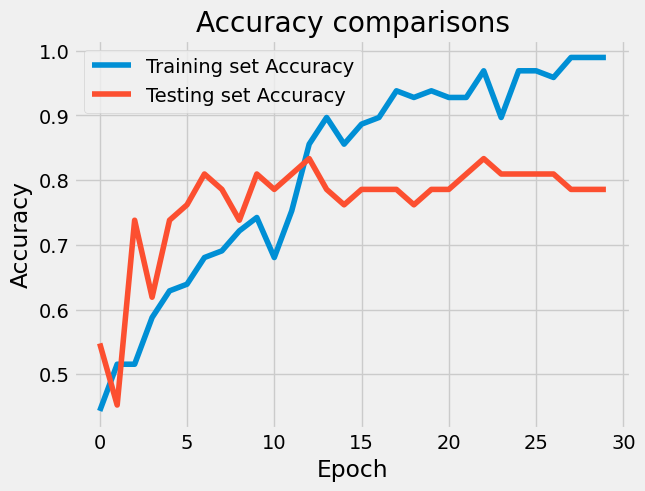

In [40]:
#plotting the accuracy the model achieved on the test set with the train set
plt.plot(result.history['accuracy'], label = "Training set Accuracy")
plt.plot(result.history['val_accuracy'], label = "Testing set Accuracy")
plt.title("Accuracy comparisons")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

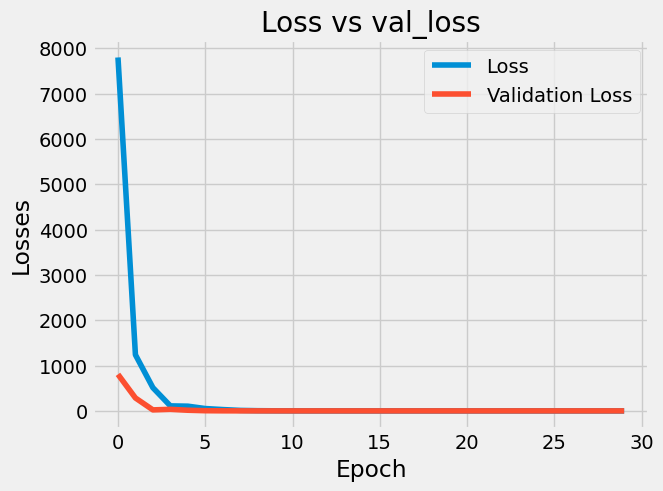

In [41]:
#plotting loss vs val_loss 
plt.plot(result.history['loss'], label = "Loss")
plt.plot(result.history['val_loss'], label = "Validation Loss")
plt.title("Loss vs val_loss")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.legend()
plt.show()